# 多層パーセプトロンの基礎

# MLPの基礎

m個の入力層とh個の隠れ層と1個の出力層からなる多層パーセプトロンは以下の図のように表現されます。

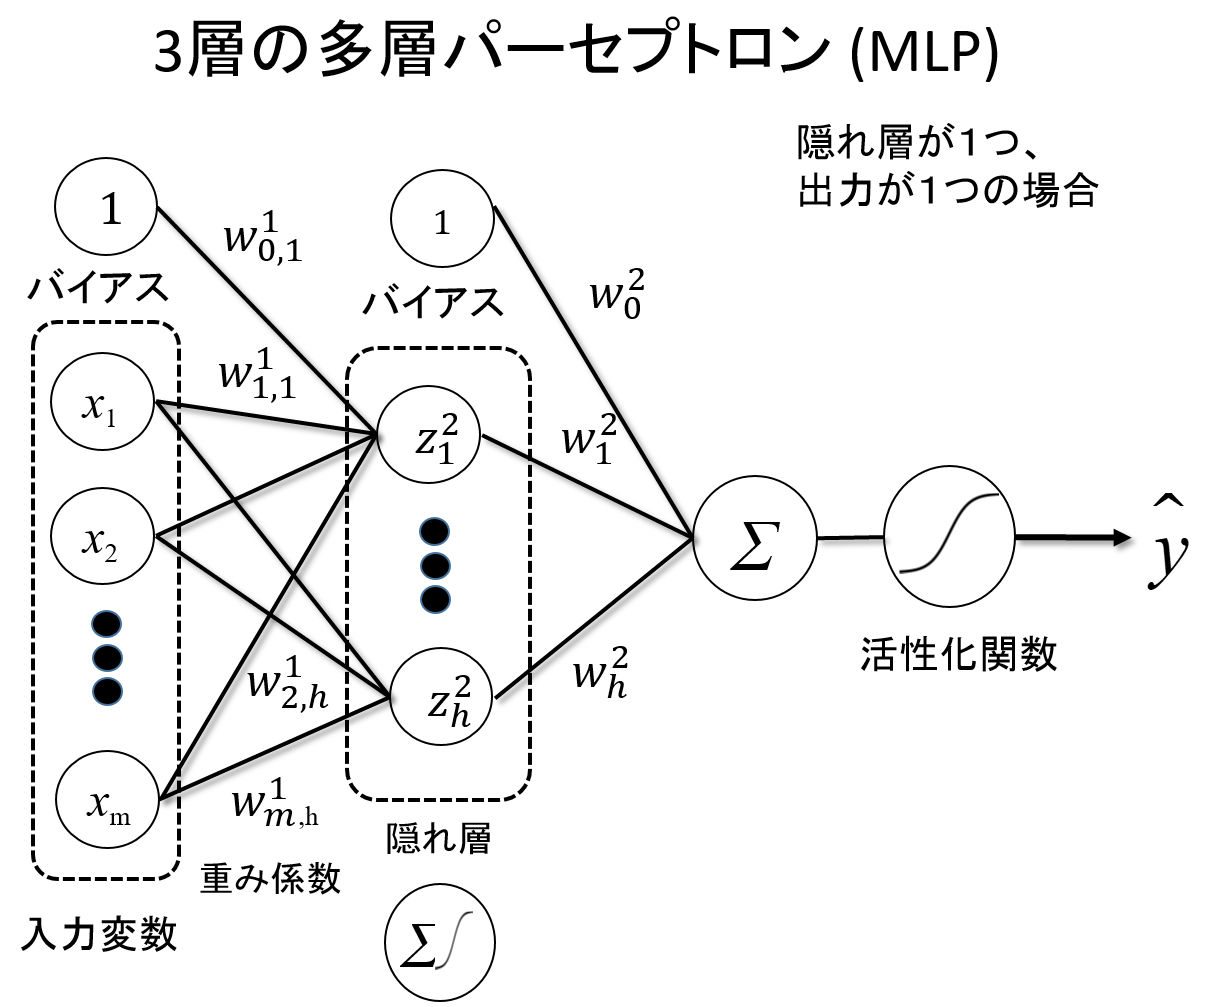

In [2]:
from IPython.display import Image
Image("images/MLP-3-layer.jpg",width="600")

# 過学習を抑えるために

# ドロップアウト

ランダムに選ばれた層のノードの一部を計算対象から外す

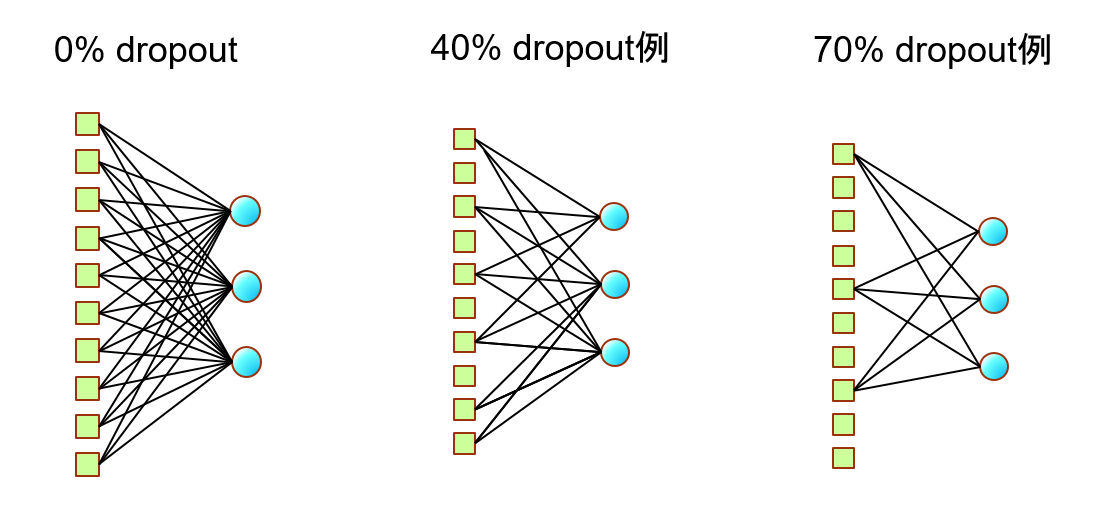

In [3]:
from IPython.display import Image
Image("images/MLP-Dropout.jpg",width="600")

# ReLU関数

# Classification  Spam メールの判定例

In [4]:
import csv
import numpy as np
import pandas as pd

url = 'http://www.tutarc.org/Seminar/Python/data/spam.csv'
cr = pd.read_csv(url)
data_all = cr.as_matrix()
numData = data_all.shape[0]
colNum = data_all.shape[1]-1 # ラベルを除外した属性数
mycolumns = list(cr.columns.values)

# 0からnumData(4601)までのpermutationインデックスを生成
a = np.append(np.arange(0,numData-1), numData-1)

#import random as rand
np.random.seed(41)
permutation = np.random.choice(a, size=numData, replace=False, p=None)

train_num = 3000
test_num = numData - train_num

b = permutation[:train_num]

# 訓練データ生成
train = np.zeros((train_num,colNum),dtype=float)
trainLabel = np.zeros(train_num, dtype=int)
for i in range(train_num):
    line = data_all[b[i]]
    for j in range(colNum):
        train[i,j] = float(line[j])
    if line[colNum]=='spam':
        trainLabel[i] = 1 # spam
    else:
        trainLabel[i] = 0 #non-spam

print('訓練データのシェープ',train.shape)

# テストデータ生成
test = np.zeros((test_num,colNum),dtype=float)
testLabel = np.zeros(test_num, dtype=int)
b_test = permutation[train_num:numData]
for i in range(test_num):
    line = data_all[b_test[i]]
    for j in range(colNum):
        test[i,j] = float(line[j])

    if line[colNum]=='spam':
        testLabel[i] = 1 # spam
    else:
        testLabel[i] = 0 #non-spa
        
print('テストデータのシェープ',test.shape)

訓練データのシェープ (3000, 57)
テストデータのシェープ (1601, 57)


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3  
session = tf.Session(config=config)
import keras
from keras import backend as K
K.set_session(session) 

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# create model
model = Sequential()
model.add(Dense(24, input_dim=57, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                1392      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [7]:
# compile model
model.compile(loss='binary_crossentropy' , 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(train, trainLabel, 
                    epochs=30, batch_size=64,
                    verbose=1,
                    validation_data=(test, testLabel))


Train on 3000 samples, validate on 1601 samples
Epoch 1/30
3000/3000 [==============================] - 0s 130us/step - loss: 0.6764 - acc: 0.6280 - val_loss: 0.6573 - val_acc: 0.7245
Epoch 2/30
3000/3000 [==============================] - 0s 31us/step - loss: 0.6458 - acc: 0.7333 - val_loss: 0.6109 - val_acc: 0.8057
Epoch 3/30
3000/3000 [==============================] - 0s 26us/step - loss: 0.5809 - acc: 0.7970 - val_loss: 0.5488 - val_acc: 0.8126
Epoch 4/30
3000/3000 [==============================] - 0s 31us/step - loss: 0.4985 - acc: 0.8097 - val_loss: 0.4269 - val_acc: 0.8295
Epoch 5/30
3000/3000 [==============================] - 0s 31us/step - loss: 0.4301 - acc: 0.8417 - val_loss: 0.3772 - val_acc: 0.8632
Epoch 6/30
3000/3000 [==============================] - 0s 26us/step - loss: 0.3862 - acc: 0.8547 - val_loss: 0.3641 - val_acc: 0.8595
Epoch 7/30
3000/3000 [==============================] - 0s 31us/step - loss: 0.3463 - acc: 0.8710 - val_loss: 0.3131 - val_acc: 0.9038
Epoch 

In [8]:
print(history, dir(history))
print(history.params)

<keras.callbacks.History object at 0x000001E501334F60> ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']
{'batch_size': 64, 'epochs': 30, 'steps': None, 'samples': 3000, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}


In [9]:
# Matplotlibのフォントの制御（大きさや種類）
%matplotlib inline
import numpy as np # Numpy
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


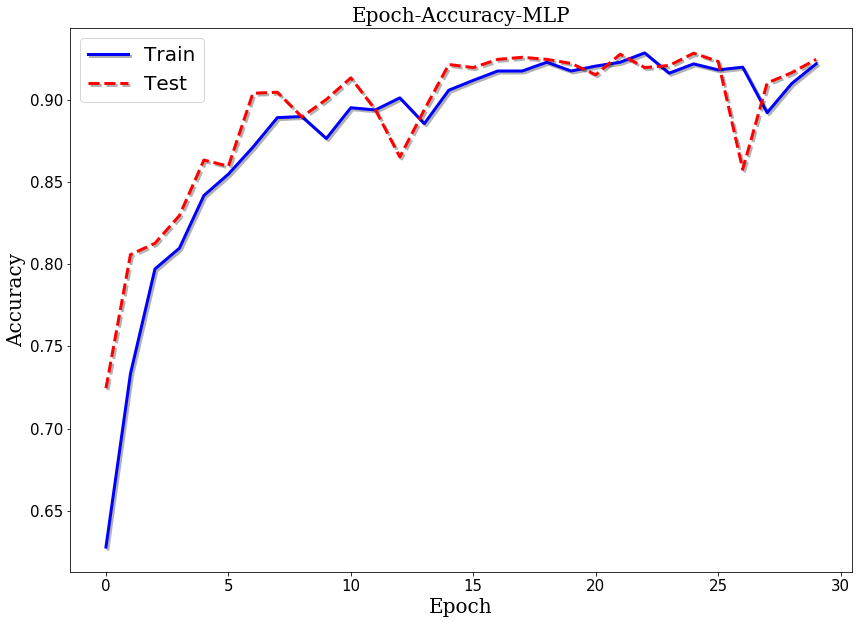

In [10]:
% matplotlib inline
import matplotlib.pyplot as plt

# 精度グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(history.history['acc'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(history.history['val_acc'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.tick_params(labelsize=15)
plt.title('Epoch-Accuracy-MLP',fontsize=25,font_properties=fp2)
plt.ylabel('Accuracy',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)

plt.savefig('Epoch-Accuracy-MLP.pdf')
plt.show()
